In [1]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
N = 1000

# Erstelle zufällig eingabe
x =torch.rand(N, 2)




In [3]:
print(x.shape)

torch.Size([1000, 2])


In [4]:
def f(x):
    val = x[:,0]  + x[:,1]
    return val

In [5]:
y = f(x)
#y = torch.rand(N, 1)


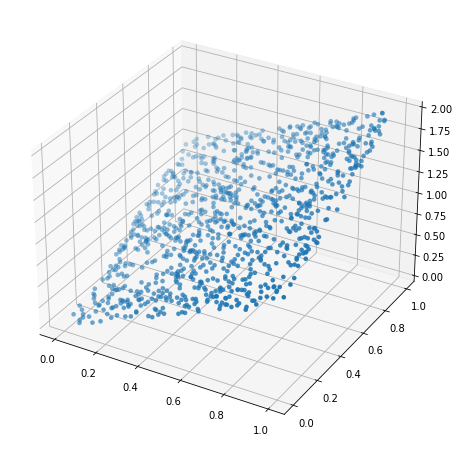

In [6]:
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)

plt.show()

In [7]:
model = torch.nn.Sequential(
          torch.nn.Linear(x.shape[1], 5),
          torch.nn.Tanh(),
          torch.nn.Linear(5, 1), 
        )

loss_fn = torch.nn.MSELoss(reduction='sum')

# Training

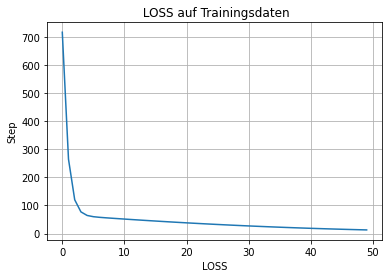

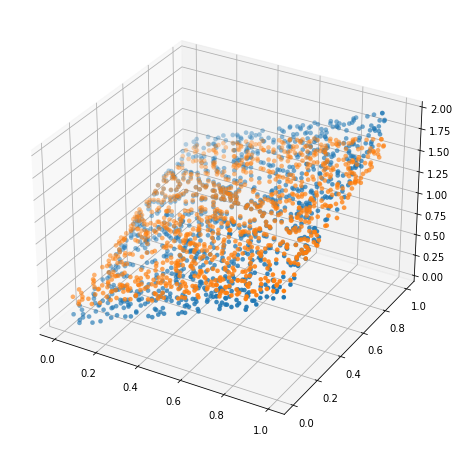

In [8]:
learning_rate = 1e-4

training = []
for t in range(50):
  
    y_pred = model(x)

  
    loss = loss_fn(torch.reshape(y_pred, (-1,)), y)
    training.append([loss, model.named_parameters()])
  
    model.zero_grad()

    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad

loss = [step[0] for step in training]
fig, ax = plt.subplots()

ax.plot(loss)

ax.set(xlabel='LOSS', ylabel='Step',
       title=' LOSS auf Trainingsdaten')
ax.grid()

#fig.savefig("test.png")
plt.show()


fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),torch.reshape(y_pred, (-1,)).tolist(), linewidth=0.1, antialiased=True)

plt.show()


In [9]:
for step in training:
    print('-----------------------------------------')
    for name, param in step[1]:
            print(param.data) 
            print(name, param)

-----------------------------------------
tensor([[ 0.4805, -0.4114],
        [ 0.6451,  0.1176],
        [-0.4911, -0.6159],
        [-0.6336, -0.2049],
        [-0.2090, -0.2308]])
0.weight Parameter containing:
tensor([[ 0.4805, -0.4114],
        [ 0.6451,  0.1176],
        [-0.4911, -0.6159],
        [-0.6336, -0.2049],
        [-0.2090, -0.2308]], requires_grad=True)
tensor([ 0.0662,  0.5456,  0.4871, -0.0051, -0.1526])
0.bias Parameter containing:
tensor([ 0.0662,  0.5456,  0.4871, -0.0051, -0.1526], requires_grad=True)
tensor([[-0.0988,  0.6866, -0.6783, -0.4703, -0.5254]])
2.weight Parameter containing:
tensor([[-0.0988,  0.6866, -0.6783, -0.4703, -0.5254]], requires_grad=True)
tensor([0.1139])
2.bias Parameter containing:
tensor([0.1139], requires_grad=True)
-----------------------------------------
tensor([[ 0.4805, -0.4114],
        [ 0.6451,  0.1176],
        [-0.4911, -0.6159],
        [-0.6336, -0.2049],
        [-0.2090, -0.2308]])
0.weight Parameter containing:
tensor([

2.bias Parameter containing:
tensor([0.1139], requires_grad=True)
-----------------------------------------
tensor([[ 0.4805, -0.4114],
        [ 0.6451,  0.1176],
        [-0.4911, -0.6159],
        [-0.6336, -0.2049],
        [-0.2090, -0.2308]])
0.weight Parameter containing:
tensor([[ 0.4805, -0.4114],
        [ 0.6451,  0.1176],
        [-0.4911, -0.6159],
        [-0.6336, -0.2049],
        [-0.2090, -0.2308]], requires_grad=True)
tensor([ 0.0662,  0.5456,  0.4871, -0.0051, -0.1526])
0.bias Parameter containing:
tensor([ 0.0662,  0.5456,  0.4871, -0.0051, -0.1526], requires_grad=True)
tensor([[-0.0988,  0.6866, -0.6783, -0.4703, -0.5254]])
2.weight Parameter containing:
tensor([[-0.0988,  0.6866, -0.6783, -0.4703, -0.5254]], requires_grad=True)
tensor([0.1139])
2.bias Parameter containing:
tensor([0.1139], requires_grad=True)
-----------------------------------------
tensor([[ 0.4805, -0.4114],
        [ 0.6451,  0.1176],
        [-0.4911, -0.6159],
        [-0.6336, -0.2049],
  

In [10]:
y -torch.reshape(y_pred, (-1,))

tensor([-0.1265,  0.0318,  0.0688,  0.0227, -0.0005, -0.0299, -0.1238,  0.0745,
         0.0673, -0.0672, -0.1210, -0.1580, -0.1789, -0.0630,  0.1475, -0.0825,
        -0.1239, -0.0458,  0.0950, -0.0090, -0.1461,  0.0329, -0.0674, -0.1890,
         0.0329, -0.1733, -0.1082, -0.1636, -0.1760, -0.2193,  0.1273, -0.0792,
        -0.1438, -0.1379,  0.0137, -0.1254, -0.0594, -0.1444, -0.0315, -0.0672,
        -0.0936, -0.1261,  0.0602,  0.0006,  0.2835,  0.0418,  0.1865, -0.0631,
         0.0003,  0.1090,  0.0701,  0.1885,  0.0545, -0.0641,  0.1416,  0.0205,
        -0.0912, -0.0504, -0.1643, -0.1317, -0.0358, -0.0316, -0.0551,  0.0461,
        -0.0470, -0.0250,  0.2031, -0.0240, -0.0246, -0.1733, -0.1199,  0.1757,
         0.3006,  0.1705, -0.0421,  0.0252,  0.1890,  0.0028, -0.0178, -0.1122,
        -0.0319,  0.0809,  0.0048, -0.0703, -0.1837, -0.0576,  0.0099,  0.0204,
        -0.0145, -0.1259, -0.0543, -0.0870, -0.0858, -0.0980,  0.0102,  0.0497,
         0.0335, -0.1030,  0.0311, -0.03

# Test

12.29730224609375


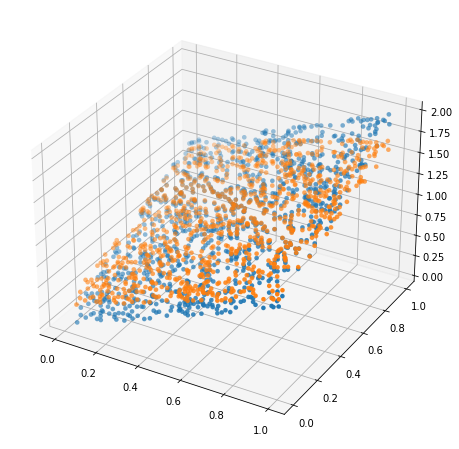

In [11]:
N = 1000

# Erstelle zufällig eingabe
x =torch.rand(N, 2)

y = f(x)

y_pred = model(x)


loss = loss_fn(torch.reshape(y_pred, (-1,)), y)

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),torch.reshape(y_pred, (-1,)).tolist(), linewidth=0.1, antialiased=True)
print(loss.item())
plt.show()